# Задание 1

Реализовать вычисление энтропии и посчитать её значение для:

* (0.2, 0.2, 0.2, 0.2, 0.2)
* (0.5, 0.5)
* (0.9, 0.05, 0.05, 0)
* (0, 0, 0, 0, 1, 0)



Объяснить полученные результаты

In [1]:
import numpy as np

def entropy(lst):
    H = 0
    for p in lst:
        if p == 0:
            continue
        H -= p * np.log2(p)
    return H

p1 = [0.2, 0.2, 0.2, 0.2, 0.2]
p2 = [0.5, 0.5]
p3 = [0.9, 0.05, 0.05, 0]
p4 = [0, 0, 0, 0, 1, 0]

print(entropy(p1))
print(entropy(p2))
print(entropy(p3))
print(entropy(p4))

2.321928094887362
1.0
0.5689955935892812
0.0


Максимальное значение энтропии достигается, если вероятность всех исходов равна, и зависит от n: при разных n будет разное максимальное значение энтропии.

В первом случае энтропия больше, чем во втором случае, потому что n больше

В последнем случае есть один исход с вероятностью единица, поэтому энтропия равна нулю (логарифм единицы равен нулю)

# Задание 2

* Напишите класс дерева, который реализует метод train, получающий на вход матрицу данных (𝑥) и целевые переменные (𝑦), на выходе функция возвращает дерево в виде словаря
* в каждом случае записывается номер признака (𝑖), порог разбиения(𝑡), значение в листовой вершине слева (𝑦𝑙) и значение в листовой вершине справа (𝑦𝑟).
* Вместо значения в листовой вершине может содержаться следующий словарь с теми же ключами и так далее

Необходимо учесть:

* Возможность строить дерево строго определенной глубины и возможность указать максимальное количество объектов в листовой вершине.
* Пороги разбиения должны лежать строго по середине между ближайшими обектами.
* Разбиений не требуется, если в получившемся множестве находятся объекты одного класса.
* Количество различных классов объектов в целевой переменной может быть больше двух.

In [2]:
class Tree:
    def __init__(self, depth=1, mex_num_leaf=1):
        pass
    def train(x, y):
        pass
    def predict(x):
        pass

* Постройте решающее дерево с глубиной 1, 2 и 3.
* Также постройте дерево максимальной глубины
* Визуализируйте получившиеся результаты классификатора на плоскости (код есть в предыдущих лабах)

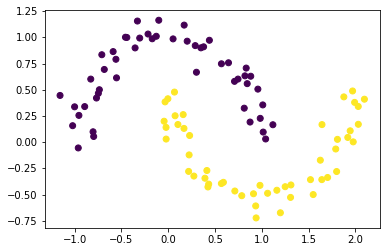

In [3]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

x, y = make_moons(n_samples=100, noise=0.1)
plt.scatter(x[:,0], x[:,1], c = y);

# Задание 3

Выполните задание 2 с помощью sklearn

In [4]:
def draw_class_border(clf, X, Y,  h=.05, cmap=plt.cm.coolwarm):
  x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
  y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))

  Z = clf.predict(np.vstack((xx.ravel(), yy.ravel())).transpose())
  Z = Z.reshape(xx.shape)

  plt.figure(figsize=(7,7))
  plt.contourf(xx, yy, Z, cmap=cmap, alpha=.5)
  plt.scatter(X[:,0], X[:,1], s=200, c = Y, cmap=cmap)
  plt.show()

max depth = 1


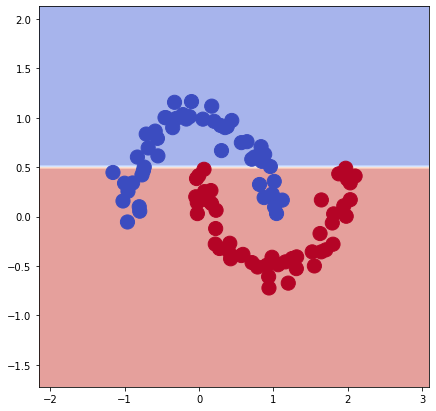



max depth = 2


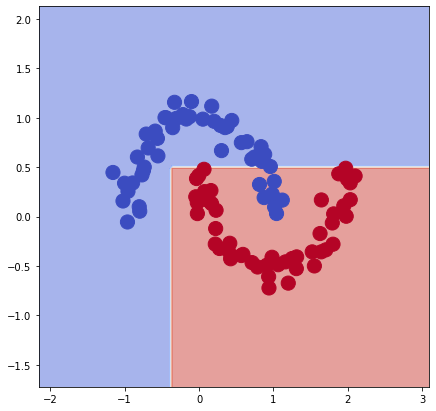



max depth = 3


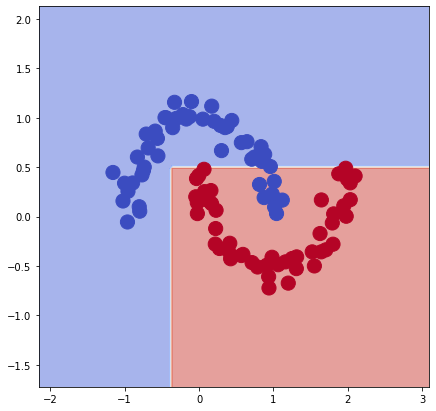



Дерево максимальной глубины:


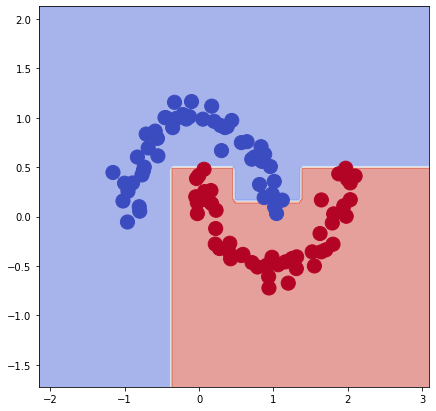

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


for k in range(1, 4, 1):
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(x_train, y_train)
    print(f'max depth = {k}')
    draw_class_border(clf, x, y)
    print('')
    print('')

print('Дерево максимальной глубины:')
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
draw_class_border(clf, x, y)